Tasks:
Data Import and Cleaning:

Import the dataset using Pandas.
Identify missing values and handle them appropriately.
Use NumPy to convert relevant columns to numerical types if necessary.
Exploratory Data Analysis:

Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
Explore the distribution of power plants by country and fuel type.
Statistical Analysis:

Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.
Time Series Analysis:

If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
Explore how the mix of fuel types for power generation has evolved over the years.
Advanced Visualization:

Create visualizations using Matplotlib and Seaborn to illustrate your findings.
Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.
Matrix Operations in Real-World Context:

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.
Integrating NumPy with Pandas and Matplotlib:

Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('gp.csv')
df.head()

<ipython-input-15-7601496529b6>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('gp.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [30]:
print("Missing values before handling:")
print(df.isnull().sum())
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
     if df[col].isnull().any():
        df[col] = df[col].fillna('Unknown')
print("\nMissing values after handling:")
print(df.isnull().sum())
print("\nData types after conversion attempts:")
df.dtypes

Missing values before handling:
country                           0
country_long                      0
name                              0
gppd_idnr                         0
capacity_mw                       0
latitude                          0
longitude                         0
primary_fuel                      0
other_fuel1                       0
other_fuel2                       0
other_fuel3                       0
commissioning_year                0
owner                             0
source                            0
url                               0
geolocation_source                0
wepp_id                           0
year_of_capacity_data             0
generation_gwh_2013               0
generation_gwh_2014               0
generation_gwh_2015               0
generation_gwh_2016               0
generation_gwh_2017               0
generation_gwh_2018               0
generation_gwh_2019               0
generation_data_source            0
estimated_generation_gwh_2013   

,0
country,object
country_long,object
name,object
gppd_idnr,object
capacity_mw,float64
latitude,float64
longitude,float64
primary_fuel,object
other_fuel1,object
other_fuel2,object



Key statistics for numerical columns:
        capacity_mw      latitude     longitude  commissioning_year  \
count  28916.000000  28916.000000  28916.000000        28916.000000   
mean     170.563778     31.988868      9.290628         1996.893766   
std      510.767585     24.268470     73.949158           14.587420   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        5.000000     26.063850    -51.226100         1996.893766   
50%       18.800000     39.959200      3.228250         1996.893766   
75%       78.000000     48.356250     76.879850         2000.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           28916.000000         28916.000000         28916.000000   
mean             2017.745656           595.915113           808.789229   
std                 1.067112           643.834573           841.346455   
min              2000.000

<ipython-input-26-a587677bd5e2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='country', order=df['country'].value_counts().index[:10], palette='viridis')


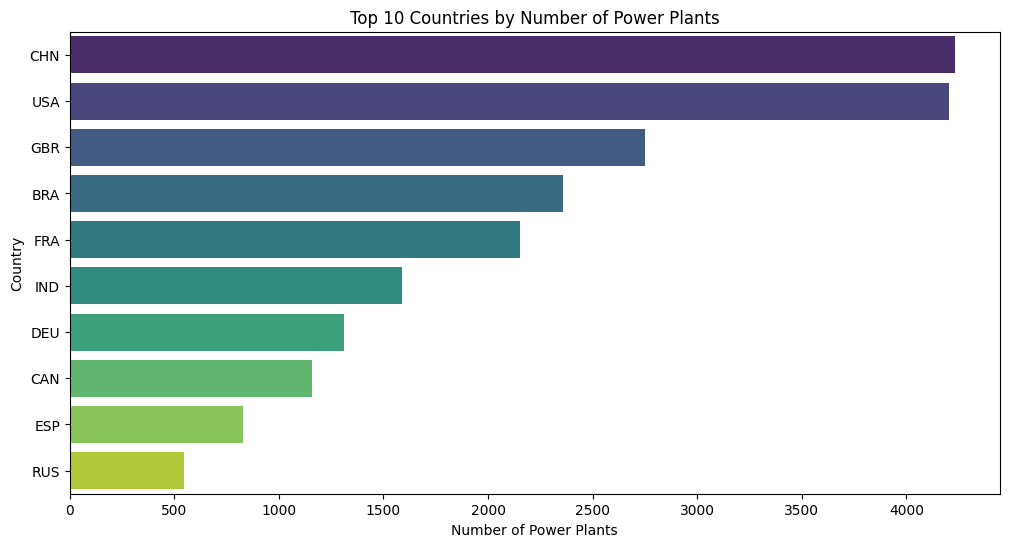

<ipython-input-26-a587677bd5e2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='primary_fuel', order=df['primary_fuel'].value_counts().index, palette='viridis')


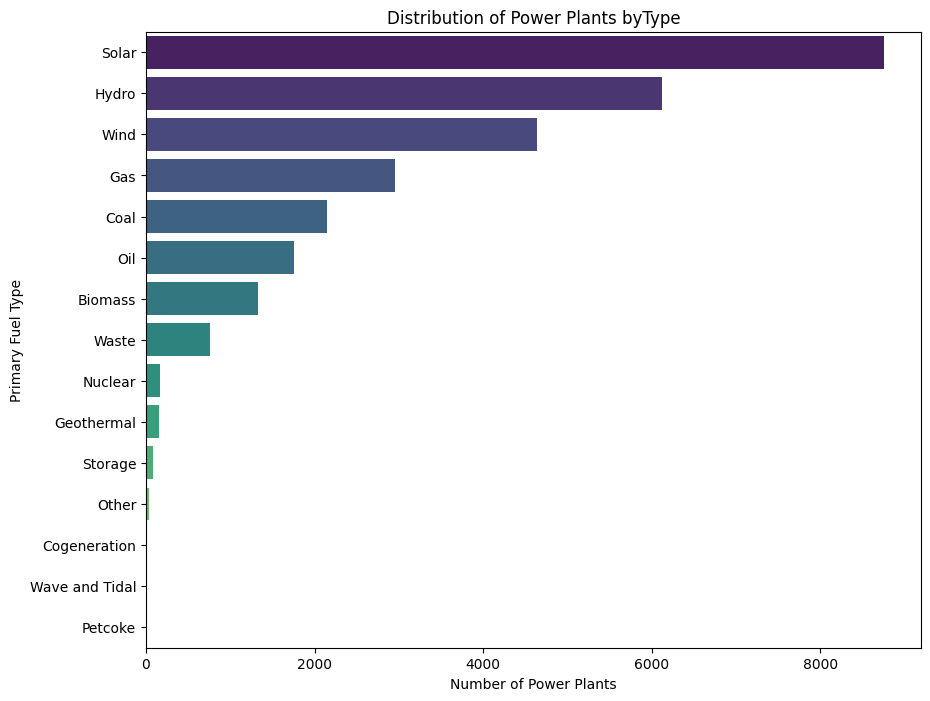

In [26]:
print("\nKey statistics for numerical columns:")
print(df[numerical_cols].describe())
print(df.columns)
# Explore the distribution of power plants by country
print("\nDistribution of power plants by country:")
print(df['country'].value_counts().head(10))

# Explore the distribution of power plants by fuel type
print("\nDistribution of power plants by fuel type:")
print(df['primary_fuel'].value_counts())

# Visualize distribution of power plants by country (Top 10)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='country', order=df['country'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Countries by Number of Power Plants')
plt.xlabel('Number of Power Plants')
plt.ylabel('Country')
plt.show()
# Visualize distribution of power plants by fuel type
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='primary_fuel', order=df['primary_fuel'].value_counts().index, palette='viridis')
plt.title('Distribution of Power Plants byType')
plt.xlabel('Number of Power Plants')
plt.ylabel('Primary Fuel Type')
plt.show()


Statistical analysis of power output by fuel type:
                       mean      median          std  count
primary_fuel                                               
Biomass           23.204256     9.19000    39.098802   1331
Coal             842.822165   600.00000   896.136412   2143
Cogeneration     180.350000    33.50000   418.542332     18
Gas              392.488197   163.35000   588.228963   2950
Geothermal        74.479139    34.00000   126.656584    151
Hydro            156.792213    23.00000   573.438795   6117
Nuclear         2133.728765  1883.40000  1381.563912    162
Oil              134.452147    10.05000   435.826971   1756
Other             96.486667    40.00000   163.331462     33
Petcoke          495.994375   114.73875   809.268778      4
Solar             18.733215     7.15436    43.228496   8754
Storage           15.408046     5.00000    43.710784     87
Waste             12.196081     4.00000    19.231664    762
Wave and Tidal    55.220000     5.00000   101.44

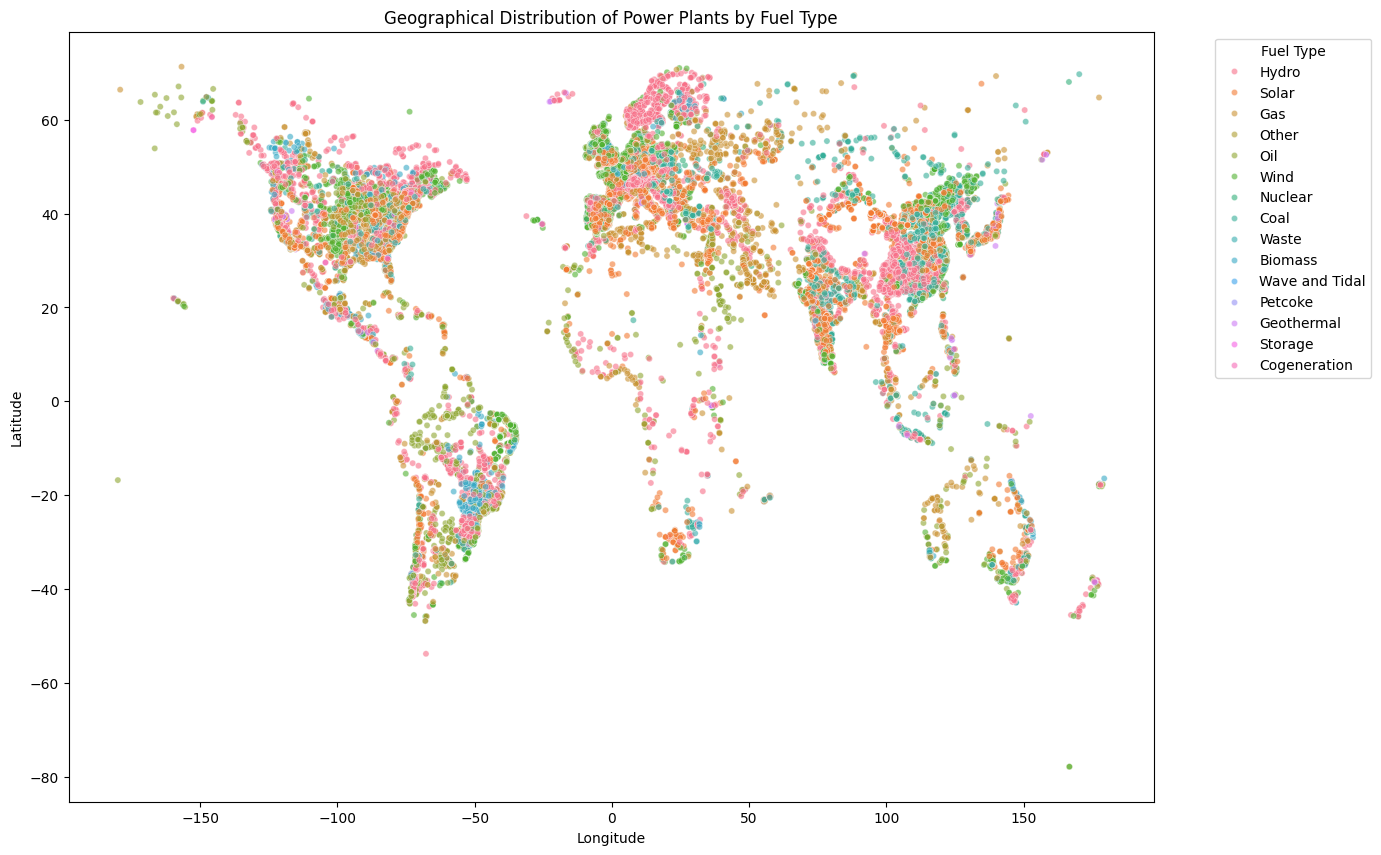


Matrix Operations Context:
Covariance Matrix of Numerical Features:
                                capacity_mw    latitude     longitude  \
capacity_mw                    2.608835e+05  -68.657899   6117.221012   
latitude                      -6.865790e+01  588.958647    -21.392814   
longitude                      6.117221e+03  -21.392814   5468.477935   
commissioning_year             8.920684e+01  -43.687364    -21.427048   
year_of_capacity_data          1.600343e+01    5.471056     -1.863957   
generation_gwh_2013            6.866440e+04 -250.724761    667.869478   
generation_gwh_2014            1.191456e+05 -508.862146   4540.608442   
generation_gwh_2015            1.980022e+05  -44.443525   6631.236626   
generation_gwh_2016            2.033716e+05    7.856941   7478.960821   
generation_gwh_2017            2.056969e+05  -96.757319   7959.127294   
generation_gwh_2018            1.246458e+05 -674.920292   5655.444998   
generation_gwh_2019            6.824374e+04 -101.552013

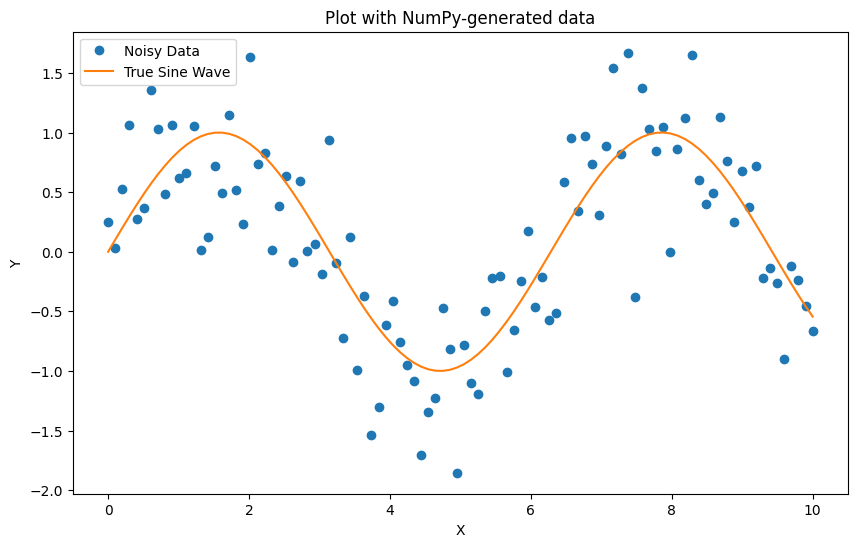


Original and log-transformed capacity (first 5 rows):
   capacity_mw  capacity_mw_log
0         33.0         3.526361
1         10.0         2.397895
2         10.0         2.397895
3         66.0         4.204693
4        100.0         4.615121


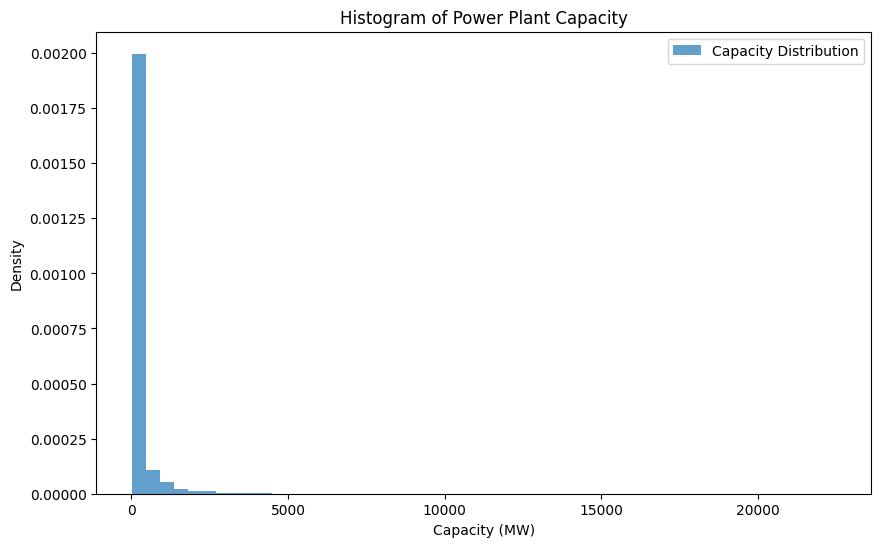

In [39]:
if 'capacity_mw' in df.columns:
  # Perform a statistical analysis of power output by fuel type
  print("\nStatistical analysis of power output by fuel type:")
  fuel_type_stats = df.groupby('primary_fuel')['capacity_mw'].agg(['mean', 'median', 'std', 'count'])
  print(fuel_type_stats)
  !pip install scipy
  from scipy import stats
  fuel_types = df['primary_fuel'].unique()
  data_for_anova = [df[df['primary_fuel'] == fuel_type]['capacity_mw'].dropna() for fuel_type in fuel_types]
  data_for_anova = [data for data in data_for_anova if len(data) > 0]

  if len(data_for_anova) > 1:
    f_statistic, p_value = stats.f_oneway(*data_for_anova)
    print("\nANOVA test for mean power output by fuel type:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
      print("Reject the null hypothesis: There is a significant difference in mean power output between fuel types.")
    else:
      print("Fail to reject the null hypothesis: There is no significant difference in mean power output between fuel types.")
  else:
    print("\nNot enough fuel types with data to perform ANOVA.")
else:
  print("\n'capacity_mw' column not found. Cannot perform statistical analysis of power output.")

if 'latitude' in df.columns and 'longitude' in df.columns:
    print("\nGeographical Distribution Visualization:")
    # Remove rows with missing lat/lon for plotting
    geo_df = df.dropna(subset=['latitude', 'longitude']).copy()

    if not geo_df.empty:
        plt.figure(figsize=(14, 10))
        sns.scatterplot(data=geo_df, x='longitude', y='latitude', hue='primary_fuel', s=20, alpha=0.6)
        plt.title('Geographical Distribution of Power Plants by Fuel Type')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
    else:
        print("\nNo data with both latitude and longitude available for geographical plotting.")
else:
    print("\nLatitude or Longitude columns not found. Cannot visualize geographical distribution.")
print("\nMatrix Operations Context:")
print("Covariance Matrix of Numerical Features:")
# Select only numerical columns for covariance matrix
numerical_df = df.select_dtypes(include=np.number)
numerical_df = numerical_df.drop(columns=['country_code', 'decade'], errors='ignore')
cov_matrix = numerical_df.cov()
print(cov_matrix)

print("\nDiscussion on Eigenvectors and Eigenvalues:")
print("In the context of data analysis, eigenvectors and eigenvalues are fundamental concepts in Principal Component Analysis (PCA).")
print("If we were to perform PCA on a matrix of our numerical features (like capacity, year, etc.),")
print("the eigenvectors of the covariance matrix would represent the directions of maximum variance in the data (the principal components).")
print("The corresponding eigenvalues would indicate the magnitude of that variance along those directions.")
print("This could be used to reduce the dimensionality of the dataset while retaining most of the important information,")
print("or to identify which combinations of features account for the most variation in the data.")
print("For example, we could find which features contribute most to the overall variance in power plant characteristics.")

print("\nIntegrating NumPy with Pandas and Matplotlib Examples:")

if 'capacity_mw' in df.columns:
    percentile_90 = np.percentile(df['capacity_mw'].dropna(), 90)
    high_capacity_plants = df[df['capacity_mw'] > percentile_90].copy()
    print(f"\nPlants with capacity above the 90th percentile ({percentile_90:.2f} MW):")
    print(high_capacity_plants[['country', 'primary_fuel', 'capacity_mw']].head())
else:
    print("\n'capacity_mw' column not found for percentile filtering example.")

np.random.seed(42)
x_data = np.linspace(0, 10, 100)
y_data = np.sin(x_data) + np.random.normal(0, 0.5, 100)

plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label='Noisy Data')
plt.plot(x_data, np.sin(x_data), '-', label='True Sine Wave')
plt.title('Plot with NumPy-generated data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

if 'capacity_mw' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['capacity_mw'].dropna(), bins=50, density=True, alpha=0.7, label='Capacity Distribution')
    plt.title('Histogram of Power Plant Capacity')
    plt.xlabel('Capacity (MW)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
else:
    print("\n'capacity_mw' column not found for histogram example.")



Time Series Analysis of Trends Over Time:


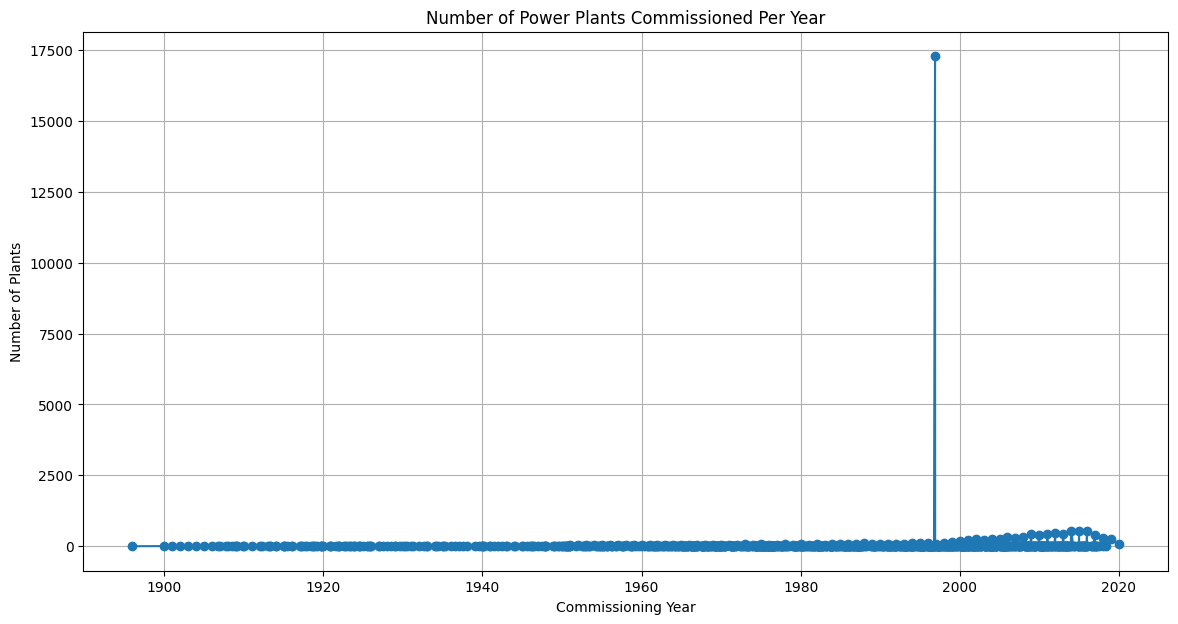

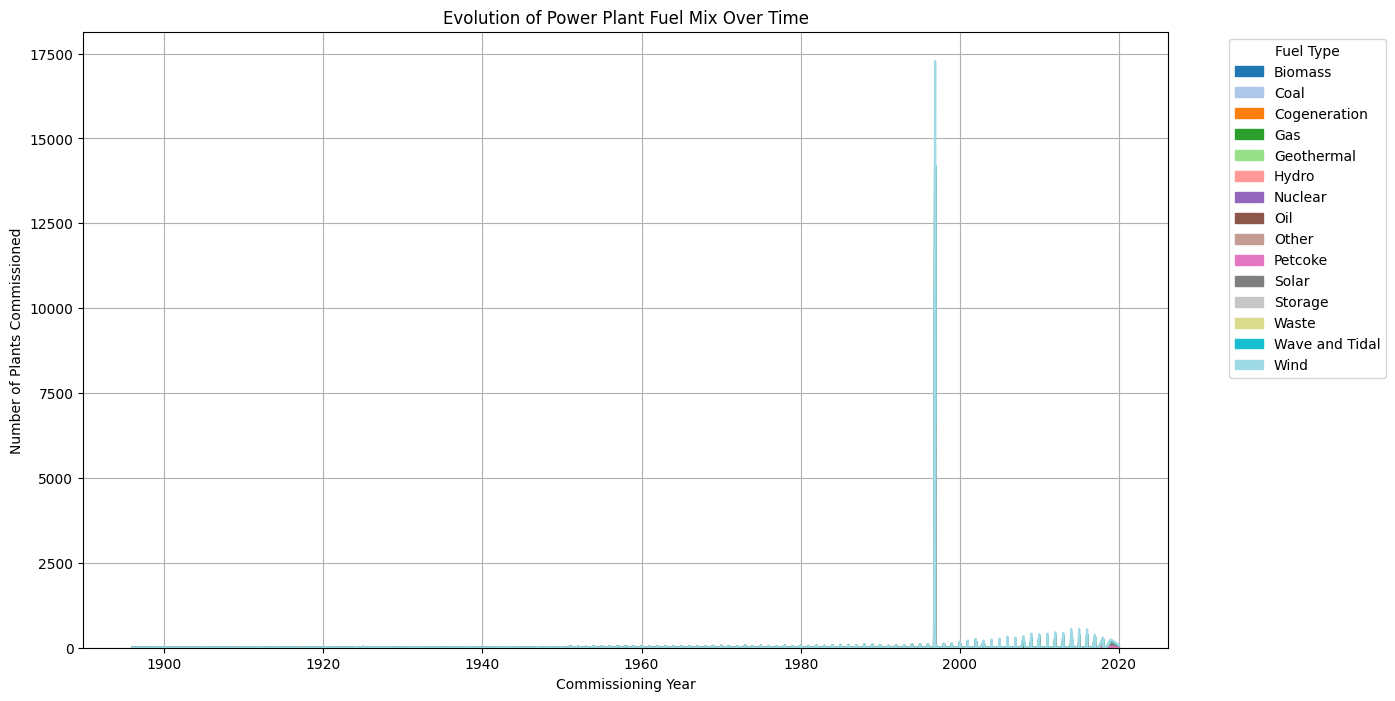

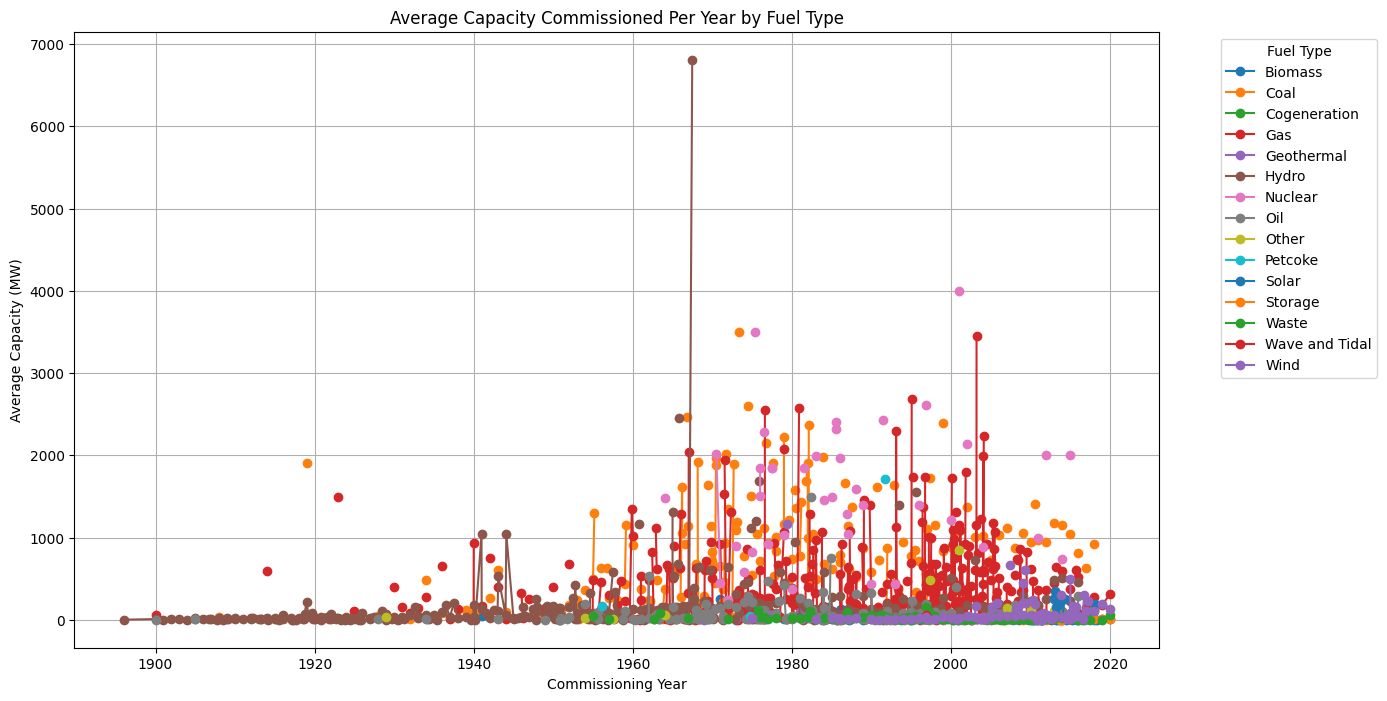

In [41]:
if 'commissioning_year' in df.columns:
    print("\nTime Series Analysis of Trends Over Time:")
    df['commissioning_year_numeric'] = pd.to_numeric(df['commissioning_year'], errors='coerce')
    # Drop rows where conversion failed
    time_series_df = df.dropna(subset=['commissioning_year_numeric']).copy()
    if not time_series_df.empty:
        plants_per_year = time_series_df['commissioning_year_numeric'].value_counts().sort_index()

        plt.figure(figsize=(14, 7))
        plants_per_year.plot(kind='line', marker='o', linestyle='-')
        plt.title('Number of Power Plants Commissioned Per Year')
        plt.xlabel('Commissioning Year')
        plt.ylabel('Number of Plants')
        plt.grid(True)
        plt.show()
        fuel_mix_over_time = time_series_df.groupby(['commissioning_year_numeric', 'primary_fuel']).size().unstack(fill_value=0)

        # Plot the evolution of fuel mix over time
        plt.figure(figsize=(14, 8))
        fuel_mix_over_time.plot(kind='area', stacked=True, colormap='tab20', ax=plt.gca())
        plt.title('Evolution of Power Plant Fuel Mix Over Time')
        plt.xlabel('Commissioning Year')
        plt.ylabel('Number of Plants Commissioned')
        plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.show()

        # Analyze average capacity commissioned over time per fuel type
        if 'capacity_mw' in time_series_df.columns:
             avg_capacity_over_time = time_series_df.groupby(['commissioning_year_numeric', 'primary_fuel'])['capacity_mw'].mean().unstack()

             plt.figure(figsize=(14, 8))
             avg_capacity_over_time.plot(kind='line', marker='o', ax=plt.gca())
             plt.title('Average Capacity Commissioned Per Year by Fuel Type')
             plt.xlabel('Commissioning Year')
             plt.ylabel('Average Capacity (MW)')
             plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
             plt.grid(True)
             plt.show()
        else:
             print("\n'capacity_mw' column not found for analyzing average capacity over time.")

    else:
        print("\nNo valid 'commissioning_year' data available for time series analysis.")
else:
    print("\n'commissioning_year' column not found. Cannot perform time series analysis.")

<ipython-input-42-9dbaabd1492e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='primary_fuel', y='capacity_mw', data=df, palette='viridis')


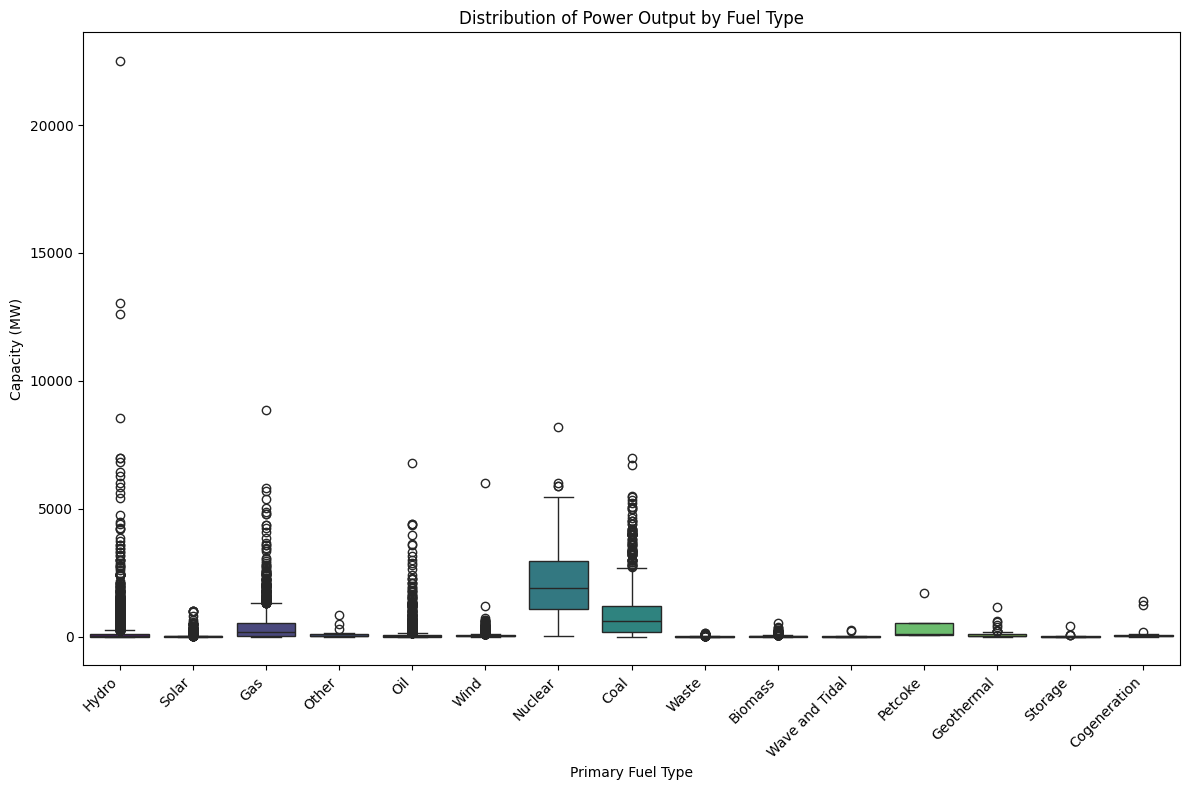

<ipython-input-42-9dbaabd1492e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='primary_fuel', y='capacity_mw', data=df, palette='muted')


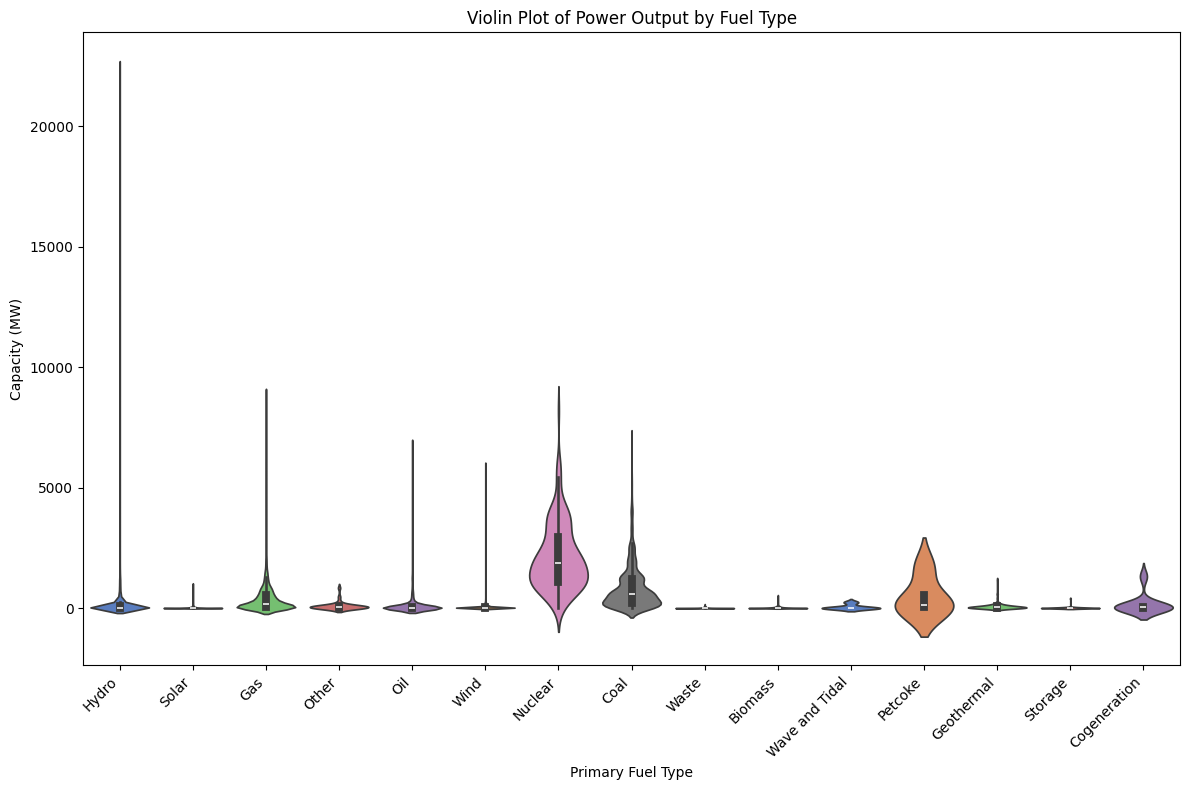

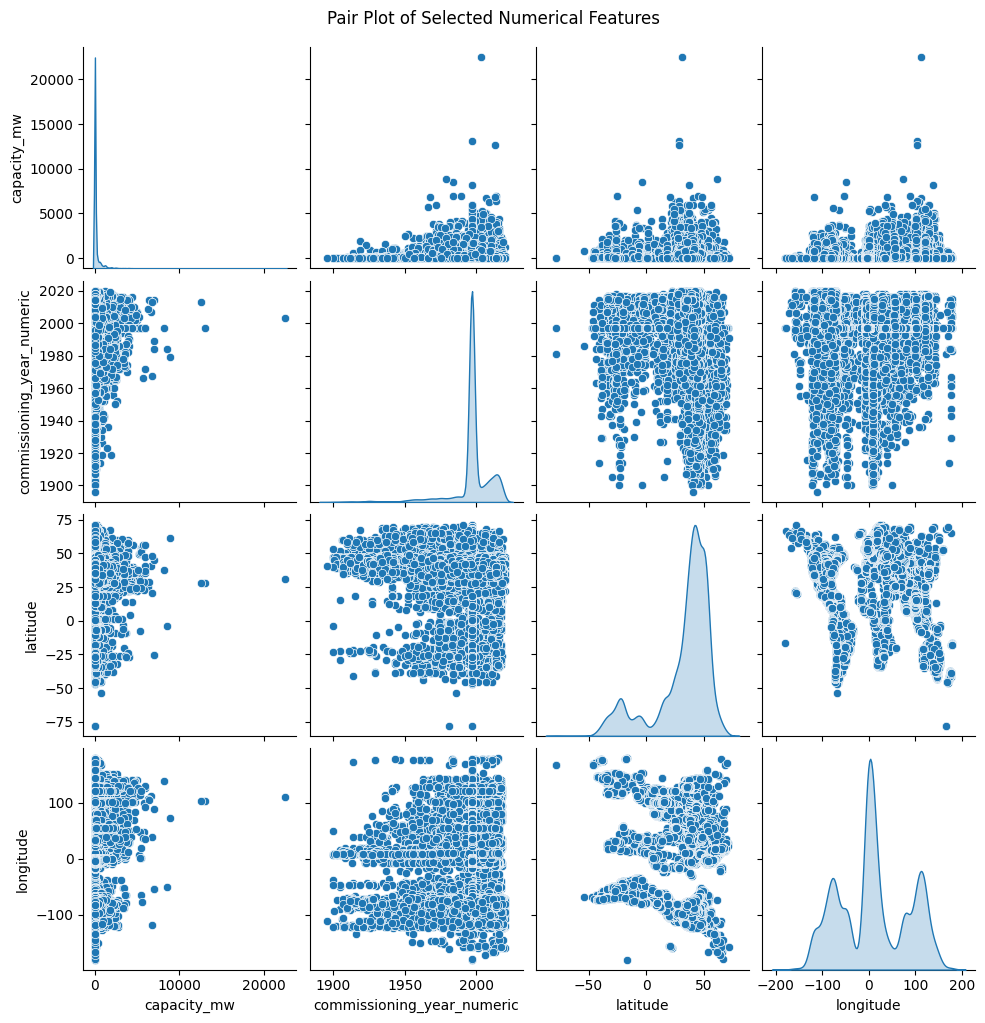

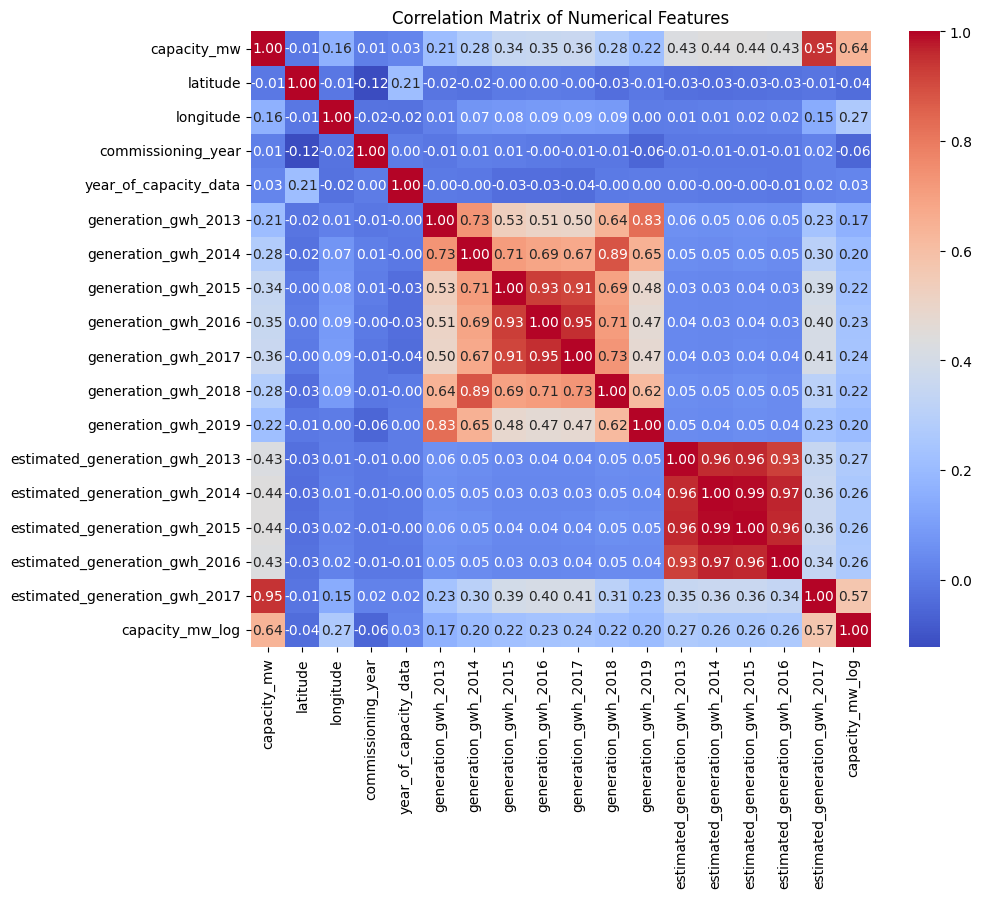

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='primary_fuel', y='capacity_mw', data=df, palette='viridis')
plt.title('Distribution of Power Output by Fuel Type')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Capacity (MW)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Example of a violion plot for a different perspective on distribution
plt.figure(figsize=(12, 8))
sns.violinplot(x='primary_fuel', y='capacity_mw', data=df, palette='muted')
plt.title('Violin Plot of Power Output by Fuel Type')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Capacity (MW)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

numerical_subset = df[['capacity_mw', 'commissioning_year_numeric', 'latitude', 'longitude']].dropna()
if not numerical_subset.empty:
    sns.pairplot(numerical_subset, diag_kind='kde')
    plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
    plt.show()
else:
    print("\nNot enough valid data in selected numerical columns for pair plot.")
if 'capacity_mw' in df.columns:
    correlation_matrix = numerical_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
else:
    print("\n'capacity_mw' column not found. Cannot generate correlation heatmap.")

In [43]:
print("\nMatrix Operations in Real-World Context - Detailed Example:")
selected_features = ['capacity_mw', 'latitude', 'longitude']

# Filter out rows with missing values in selected features
matrix_data = df[selected_features].dropna()

if not matrix_data.empty:
    # Convert the relevant Pandas DataFrame subset to a NumPy matrix
    data_matrix = matrix_data.values

    print("\nOriginal Data Matrix (Subset of Features):")
    print(data_matrix[:5, :]) # Print first 5 rows

    # --- Matrix Operations Demonstration ---

    # 1. Mean Centering the data (a common step before PCA or other matrix decompositions)
    mean_vector = np.mean(data_matrix, axis=0)
    mean_centered_matrix = data_matrix - mean_vector

    print("\nMean-Centered Data Matrix (first 5 rows):")
    print(mean_centered_matrix[:5, :])

    # 2. Calculating the Covariance Matrix using NumPy (already done previously, but showing again)
    # This matrix describes the variance within each feature and the covariance between pairs of features.
    # In a real-world context, it helps understand how features change together.
    # For example, do higher capacity plants tend to be located in specific latitudes?
    numpy_cov_matrix = np.cov(data_matrix.T) # .T is needed because np.cov expects features as rows

    print("\nCovariance Matrix calculated using NumPy:")
    print(numpy_cov_matrix)

    # 3. Demonstrating Matrix Multiplication (e.g., a simple transformation)
    # Let's define a transformation matrix (arbitrary example)
    transformation_matrix = np.array([[1.0, 0.5, 0.1],
                                      [0.2, 1.0, 0.3],
                                      [0.1, 0.3, 1.0]])

    if transformation_matrix.shape[1] == data_matrix.shape[1]:
        transformed_data = data_matrix @ transformation_matrix
        print("\nExample of Matrix Multiplication (Transformed Data - first 5 rows):")
        print(transformed_data[:5, :])
    else:
        print("\nCannot perform matrix multiplication: dimensions do not match.")

    print("\nCalculating Eigenvalues and Eigenvectors of the Covariance Matrix:")
    try:
        eigenvalues, eigenvectors = np.linalg.eig(numpy_cov_matrix)

        print("\nEigenvalues:")
        print(eigenvalues)

        print("\nEigenvectors (Principal Components):")
        print(eigenvectors)
        print("\nInterpretation of Eigenvalues and Eigenvectors:")
        print("Eigenvalues tell us how much variance is captured by each eigenvector.")
        print(f"The first eigenvalue ({eigenvalues[0]:.4f}) is the largest, meaning the first eigenvector captures the most variance")
        print("in the dataset among the selected features.")
        print("Eigenvectors tell us the combinations of original features that form these principal components.")
        print(f"For example, the first eigenvector {eigenvectors[:, 0]} represents a direction in the 3D space (capacity, latitude, longitude)")
        print("that best summarizes the spread of the data.")
        print("If we were doing PCA, we would sort eigenvalues and select the top k eigenvectors")
        print("to reduce dimensionality or identify the most important underlying factors influencing")
        print("the combination of capacity, latitude, and longitude.")
        print("This could help simplify the data or reveal hidden patterns.")

    except np.linalg.LinAlgError:
        print("\nCould not compute eigenvalues and eigenvectors. Covariance matrix might be singular.")

else:
    print("\nNot enough valid data in selected numerical columns ('capacity_mw', 'latitude', 'longitude') to demonstrate matrix operations.")




Matrix Operations in Real-World Context - Detailed Example:

Original Data Matrix (Subset of Features):
[[ 33.      32.322   65.119 ]
 [ 10.      31.67    65.795 ]
 [ 10.      31.623   65.792 ]
 [ 66.      34.556   69.4787]
 [100.      34.641   69.717 ]]

Mean-Centered Data Matrix (first 5 rows):
[[-137.5637775     0.33313228   55.82837235]
 [-160.5637775    -0.31886772   56.50437235]
 [-160.5637775    -0.36586772   56.50137235]
 [-104.5637775     2.56713228   60.18807235]
 [ -70.5637775     2.65213228   60.42637235]]

Covariance Matrix calculated using NumPy:
[[ 2.60883526e+05 -6.86578992e+01  6.11722101e+03]
 [-6.86578992e+01  5.88958647e+02 -2.13928138e+01]
 [ 6.11722101e+03 -2.13928138e+01  5.46847794e+03]]

Example of Matrix Multiplication (Transformed Data - first 5 rows):
[[ 45.9763   68.3577   78.1156 ]
 [ 22.9135   56.4085   76.296  ]
 [ 22.9038   56.3606   76.2789 ]
 [ 79.85907  88.39961  86.4455 ]
 [113.8999  105.5561   90.1093 ]]

Calculating Eigenvalues and Eigenvectors o


Integrating NumPy with Pandas and Matplotlib Examples:

Plants with capacity above the 90th percentile (465.00 MW):
   country primary_fuel  capacity_mw
10     ALB        Hydro        500.0
11     ALB        Hydro        600.0
19     DZA          Gas        520.0
27     DZA          Gas        560.0
36     DZA          Gas       1200.0


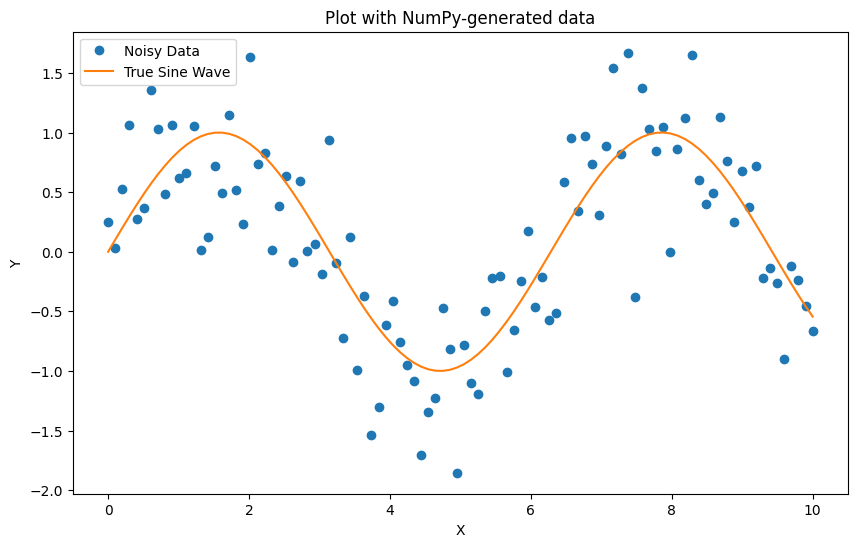

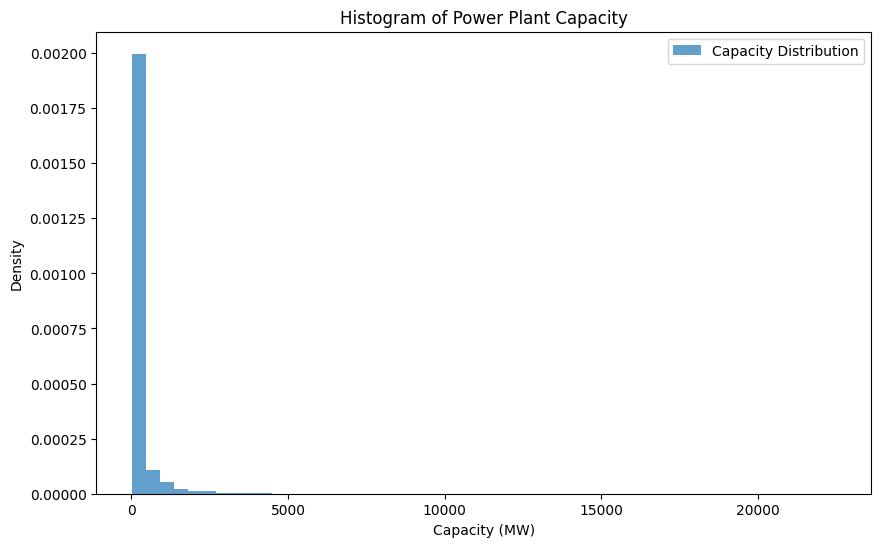


Time Series Analysis of Trends Over Time:


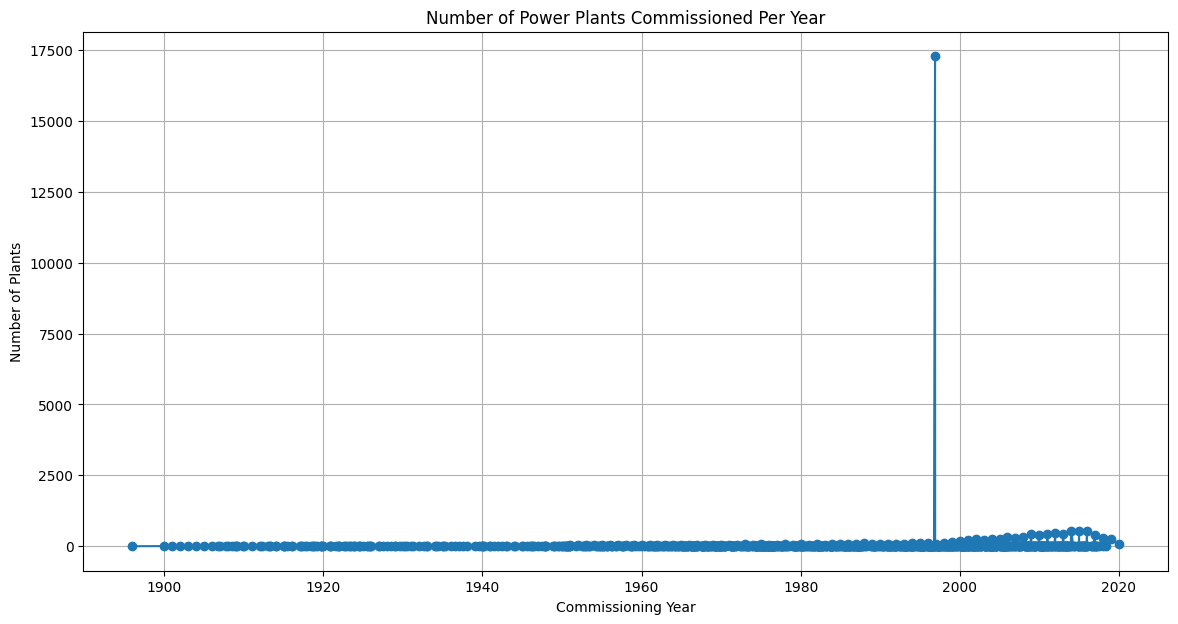

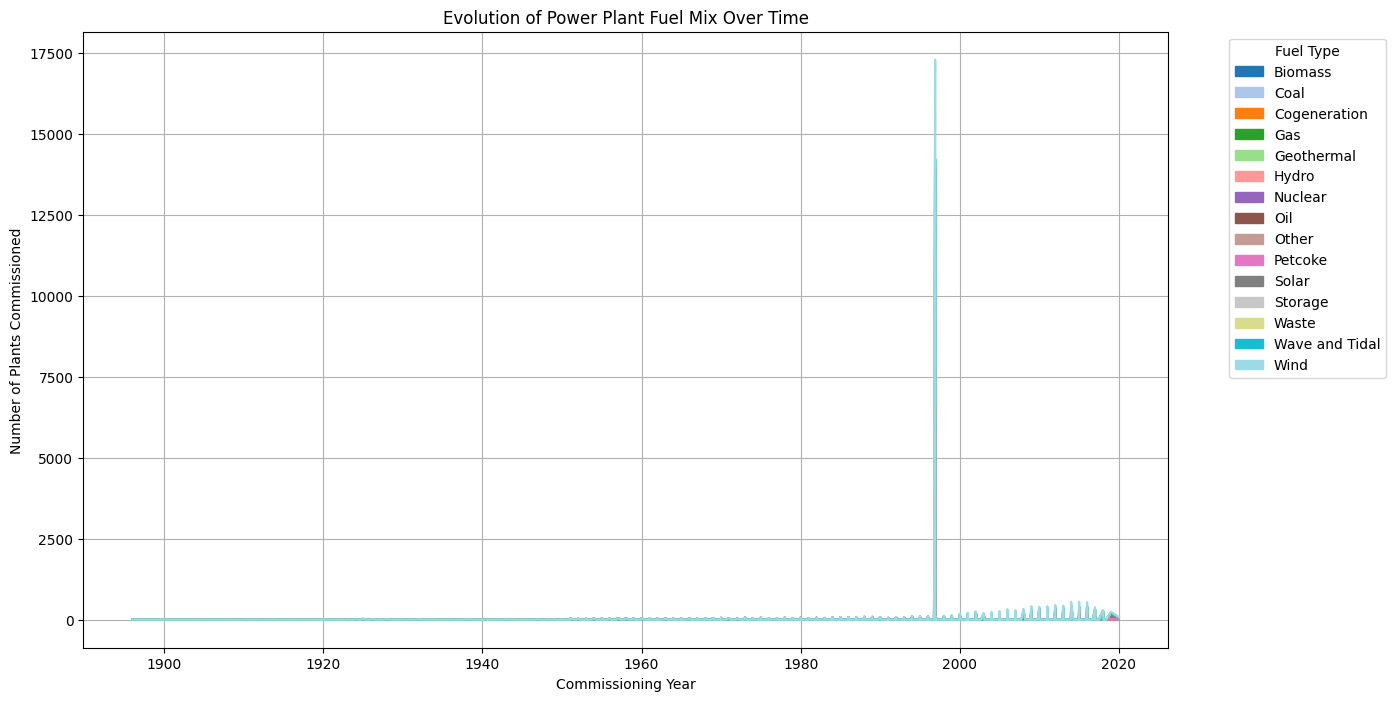

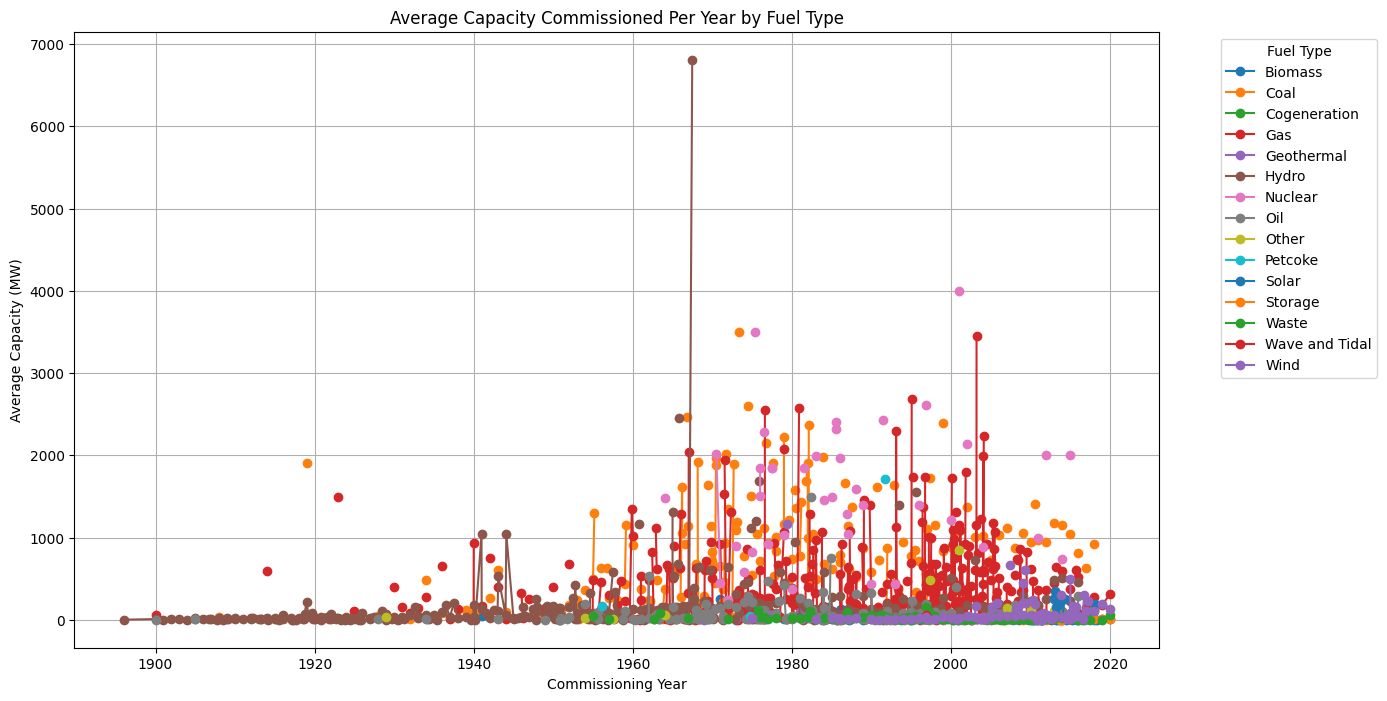


Original Data Matrix (Subset of Features):
[[ 33.      32.322   65.119 ]
 [ 10.      31.67    65.795 ]
 [ 10.      31.623   65.792 ]
 [ 66.      34.556   69.4787]
 [100.      34.641   69.717 ]]

Mean-Centered Data Matrix (first 5 rows):
[[-137.5637775     0.33313228   55.82837235]
 [-160.5637775    -0.31886772   56.50437235]
 [-160.5637775    -0.36586772   56.50137235]
 [-104.5637775     2.56713228   60.18807235]
 [ -70.5637775     2.65213228   60.42637235]]

Covariance Matrix calculated using NumPy:
[[ 2.60883526e+05 -6.86578992e+01  6.11722101e+03]
 [-6.86578992e+01  5.88958647e+02 -2.13928138e+01]
 [ 6.11722101e+03 -2.13928138e+01  5.46847794e+03]]

Example of Matrix Multiplication (Transformed Data - first 5 rows):
[[ 45.9763   68.3577   78.1156 ]
 [ 22.9135   56.4085   76.296  ]
 [ 22.9038   56.3606   76.2789 ]
 [ 79.85907  88.39961  86.4455 ]
 [113.8999  105.5561   90.1093 ]]

Calculating Eigenvalues and Eigenvectors of the Covariance Matrix using NumPy:

Eigenvalues:
[261029.96

In [45]:

print("\nIntegrating NumPy with Pandas and Matplotlib Examples:")

if 'capacity_mw' in df.columns:
    # Use NumPy's percentile function on a Pandas Series
    percentile_90 = np.percentile(df['capacity_mw'].dropna(), 90)
    # Use NumPy array for complex boolean indexing in Pandas
    high_capacity_plants_indices = np.where(df['capacity_mw'] > percentile_90)[0]
    high_capacity_plants = df.iloc[high_capacity_plants_indices].copy()
    print(f"\nPlants with capacity above the 90th percentile ({percentile_90:.2f} MW):")
    print(high_capacity_plants[['country', 'primary_fuel', 'capacity_mw']].head())
else:
    print("\n'capacity_mw' column not found for percentile filtering example.")

# Use NumPy arrays to create data for plotting in Matplotlib
np.random.seed(42)
x_data = np.linspace(0, 10, 100)
y_data = np.sin(x_data) + np.random.normal(0, 0.5, 100)

plt.figure(figsize=(10, 6))
# Plotting NumPy arrays directly
plt.plot(x_data, y_data, 'o', label='Noisy Data')
plt.plot(x_data, np.sin(x_data), '-', label='True Sine Wave') # Plotting another NumPy array
plt.title('Plot with NumPy-generated data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

if 'capacity_mw' in df.columns:
    # Use NumPy array extracted from a Pandas Series for plotting a histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['capacity_mw'].dropna().to_numpy(), bins=50, density=True, alpha=0.7, label='Capacity Distribution')
    plt.title('Histogram of Power Plant Capacity')
    plt.xlabel('Capacity (MW)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
else:
    print("\n'capacity_mw' column not found for histogram example.")

if 'commissioning_year' in df.columns:
    print("\nTime Series Analysis of Trends Over Time:")
    # Convert to numeric using Pandas, handle errors with NumPy
    df['commissioning_year_numeric'] = pd.to_numeric(df['commissioning_year'], errors='coerce')
    # Drop rows where conversion failed using Pandas .dropna()
    time_series_df = df.dropna(subset=['commissioning_year_numeric']).copy()

    if not time_series_df.empty:
        # Use Pandas value_counts() and sort_index()
        plants_per_year = time_series_df['commissioning_year_numeric'].value_counts().sort_index()

        plt.figure(figsize=(14, 7))
        # Plotting a Pandas Series (which is based on NumPy arrays internally)
        plants_per_year.plot(kind='line', marker='o', linestyle='-')
        plt.title('Number of Power Plants Commissioned Per Year')
        plt.xlabel('Commissioning Year')
        plt.ylabel('Number of Plants')
        plt.grid(True)
        plt.show()

        # Grouping and unstacking with Pandas
        fuel_mix_over_time = time_series_df.groupby(['commissioning_year_numeric', 'primary_fuel']).size().unstack(fill_value=0)

        # Plot the evolution of fuel mix over time using Pandas plot (leveraging Matplotlib)
        plt.figure(figsize=(14, 8))
        fuel_mix_over_time.plot(kind='area', stacked=True, colormap='tab20', ax=plt.gca())
        plt.title('Evolution of Power Plant Fuel Mix Over Time')
        plt.xlabel('Commissioning Year')
        plt.ylabel('Number of Plants Commissioned')
        plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.show()

        # Analyze average capacity commissioned over time per fuel type
        if 'capacity_mw' in time_series_df.columns:
            # Grouping and calculating mean with Pandas
             avg_capacity_over_time = time_series_df.groupby(['commissioning_year_numeric', 'primary_fuel'])['capacity_mw'].mean().unstack()

             plt.figure(figsize=(14, 8))
             # Plotting the resulting Pandas DataFrame
             avg_capacity_over_time.plot(kind='line', marker='o', ax=plt.gca())
             plt.title('Average Capacity Commissioned Per Year by Fuel Type')
             plt.xlabel('Commissioning Year')
             plt.ylabel('Average Capacity (MW)')
             plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
             plt.grid(True)
             plt.show()
        else:
             print("\n'capacity_mw' column not found for analyzing average capacity over time.")

    else:
        print("\nNo valid 'commissioning_year' data available for time series analysis.")
else:
    print("\n'commissioning_year' column not found. Cannot perform time series analysis.")


    plt.show()

if not matrix_data.empty:
    # Convert the relevant Pandas DataFrame subset to a NumPy matrix using .values
    data_matrix = matrix_data.values

    print("\nOriginal Data Matrix (Subset of Features):")
    print(data_matrix[:5, :]) # Print first 5 rows

    # --- Matrix Operations Demonstration using NumPy ---

    # 1. Mean Centering the data (a common step before PCA or other matrix decompositions)
    # Using NumPy's mean function
    mean_vector = np.mean(data_matrix, axis=0)
    mean_centered_matrix = data_matrix - mean_vector # NumPy element-wise subtraction

    print("\nMean-Centered Data Matrix (first 5 rows):")
    print(mean_centered_matrix[:5, :])

    # 2. Calculating the Covariance Matrix using NumPy
    # This matrix describes the variance within each feature and the covariance between pairs of features.
    # In a real-world context, it helps understand how features change together.
    # For example, do higher capacity plants tend to be located in specific latitudes?
    numpy_cov_matrix = np.cov(data_matrix.T) # .T is needed because np.cov expects features as rows

    print("\nCovariance Matrix calculated using NumPy:")
    print(numpy_cov_matrix)

    # 3. Demonstrating Matrix Multiplication using NumPy's @ operator
    # Let's define a transformation matrix (arbitrary example)
    transformation_matrix = np.array([[1.0, 0.5, 0.1],
                                      [0.2, 1.0, 0.3],
                                      [0.1, 0.3, 1.0]])

    if transformation_matrix.shape[1] == data_matrix.shape[1]:
        transformed_data = data_matrix @ transformation_matrix # NumPy matrix multiplication
        print("\nExample of Matrix Multiplication (Transformed Data - first 5 rows):")
        print(transformed_data[:5, :])
    else:
        print("\nCannot perform matrix multiplication: dimensions do not match.")

    print("\nCalculating Eigenvalues and Eigenvectors of the Covariance Matrix using NumPy:")
    try:
        # Use NumPy's linear algebra module to compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(numpy_cov_matrix)

        print("\nEigenvalues:")
        print(eigenvalues)

        print("\nEigenvectors (Principal Components):")
        print(eigenvectors)
        print("\nInterpretation of Eigenvalues and Eigenvectors:")
        print("Eigenvalues tell us how much variance is captured by each eigenvector.")
        print(f"The first eigenvalue ({eigenvalues[0]:.4f}) is the largest, meaning the first eigenvector captures the most variance")
        print("in the dataset among the selected features.")
        print("Eigenvectors tell us the combinations of original features that form these principal components.")
        print(f"For example, the first eigenvector {eigenvectors[:, 0]} represents a direction in the 3D space (capacity, latitude, longitude)")
        print("that best summarizes the spread of the data.")
        print("If we were doing PCA, we would sort eigenvalues and select the top k eigenvectors")
        print("to reduce dimensionality or identify the most important underlying factors influencing")
        print("the combination of capacity, latitude, and longitude.")
        print("This could help simplify the data or reveal hidden patterns.")

    except np.linalg.LinAlgError:
        print("\nCould not compute eigenvalues and eigenvectors. Covariance matrix might be singular.")

else:
    print("\nNot enough valid data in selected numerical columns ('capacity_mw', 'latitude', 'longitude') to demonstrate matrix operations.")